Data Mining Kelompok 1

Ketua : Achmad Reza Fahcruroji (11200940000024)

Anggota : 

- Firdha Wulandari (11200940000020)
- Issa Bella Safitri (11200940000021)
- Lugis Budiman (11200940000022)
- Naila Nabiha Qonita (11200940000053)

## Pertama kita upload atau masukan terlebih dahulu ketiga data yang akan kita olah

In [196]:
# Loading Data:
# import library
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

try: # Running Locally, yakinkan "file_" berada di folder "data"
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/jakarta.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/depok.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/tangerang.csv
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
    
dfJ.shape, dfD.shape, dfT.shape

((1024, 26), (998, 26), (128, 26))

In [197]:
def del_nan(data):
  data.dropna(axis=0, thresh=4, inplace=True)
  data.dropna(axis=1, how='all', inplace=True)
  return data

In [198]:
a = del_nan(dfJ)
b = del_nan(dfD)
c = del_nan(dfT)

In [199]:
a

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,22-11-2021,220.0,239.0,5.0,4.0,1.0,2.0,Jakarta Timur,PPJB,3500.0,NaN,3.850000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah Mewah siap huni 2 lantai 220m 10x22 type...
117,06-12-2021,70.0,57.0,3.0,2.0,NaN,2.0,Jakarta Timur,SHM,2200.0,NaN,8.800000e+08,https://www.rumah.com/listing-properti/dijual-...,Rumah Signature Location & Access :\n• 2 Menit...
118,06-12-2021,315.0,280.0,4.0,3.0,1.0,2.0,Jakarta Timur,SHM + IMB,3500.0,Timur,4.300000e+09,https://www.rumah.com/listing-properti/dijual-...,"Rumah 1, 5 Lantai Luas Strategis di Pondok Bam..."
119,06-12-2021,135.0,190.0,5.0,5.0,NaN,2.0,Jakarta Timur,SHM + IMB,2200.0,Selatan,3.400000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah Baru Non Komplek Posisi Hook Lokasi Stra...


In [200]:
a.insert(1, 'Kota', 'Jakarta')
a.head()

,created_at,Kota,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,06-12-2021,Jakarta,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,02-12-2021,Jakarta,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,06-12-2021,Jakarta,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,06-12-2021,Jakarta,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,06-12-2021,Jakarta,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."


In [201]:
# mengubah harga dalam satuan juta
a['harga'] = a['harga']/1000000
a.head()

,created_at,Kota,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,06-12-2021,Jakarta,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,4500.0,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,02-12-2021,Jakarta,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1100.0,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,06-12-2021,Jakarta,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,395.0,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,06-12-2021,Jakarta,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,835.0,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,06-12-2021,Jakarta,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1100.0,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."


In [202]:
b

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,6-12-2021,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,Selatan,2100.0,https://www.rumah123.com/properti/depok/hos928...,Rumah siap huni komplek Pelni
1,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,NaN,250.0,https://www.rumah123.com/properti/depok/hos928...,rumah minimalis termurah di citayam
2,6-12-2021,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,Barat,250.0,https://www.rumah123.com/properti/depok/hos928...,CLUSTER TERMURAH DI SAWANGAN KOTA DEPOK
3,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,NaN,250.0,https://www.rumah123.com/properti/depok/hos928...,RUMAH SIAP HUNI HARGA NEGO DEKAT STASIUN CITAYAM
4,6-12-2021,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,Timur,350.0,https://www.rumah123.com/properti/depok/hos928...,Rumah Cluster Siap Huni Depok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,4-12-2021,79,115.0,2.0,1.0,1.0,1.0,Sukmajaya,SHM,NaN,NaN,750.0,https://www.rumah123.com/properti/depok/hos928...,Rumah di Depok Timur
114,4-12-2021,72,45.0,2.0,1.0,NaN,1.0,Cimanggis,SHM,NaN,NaN,1000.0,https://www.rumah123.com/properti/depok/hos928...,PERUMAHAN NUANSA PERMAI DEPOK
115,4-12-2021,40,40.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,Timur,195.0,https://www.rumah123.com/properti/depok/hos928...,rumah semi minimalis manis harga ekonomis di c...
116,4-12-2021,50,50.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,Selatan,185.0,https://www.rumah123.com/properti/depok/hos927...,rumah semi minimalis dua kamar siap huni di ci...


In [203]:
b.insert(1, 'Kota', 'Depok')
b.head()

,created_at,Kota,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,6-12-2021,Depok,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,Selatan,2100.0,https://www.rumah123.com/properti/depok/hos928...,Rumah siap huni komplek Pelni
1,6-12-2021,Depok,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,NaN,250.0,https://www.rumah123.com/properti/depok/hos928...,rumah minimalis termurah di citayam
2,6-12-2021,Depok,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,Barat,250.0,https://www.rumah123.com/properti/depok/hos928...,CLUSTER TERMURAH DI SAWANGAN KOTA DEPOK
3,6-12-2021,Depok,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,NaN,250.0,https://www.rumah123.com/properti/depok/hos928...,RUMAH SIAP HUNI HARGA NEGO DEKAT STASIUN CITAYAM
4,6-12-2021,Depok,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,Timur,350.0,https://www.rumah123.com/properti/depok/hos928...,Rumah Cluster Siap Huni Depok


In [204]:
c

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,12-06-2021,60.0,50.0,3.0,2.0,NaN,NaN,"BSD CITY, TANGERANG",SHM,1300.0,Selatan,500.0,https://www.rumah123.com/properti/tangerang/ho...,"Rumah 2 Lantai Akses Strategis, Keamanan 24jam..."
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,NaN,480.0,https://www.rumah123.com/properti/tangerang/ho...,"lokasi strategis dekat gading serpong, dekat a..."
2,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,NaN,600.0,https://www.rumah123.com/properti/tangerang/ho...,"Boston Village Bintaro, Cluster dengan konsep ..."
3,12-06-2021,200.0,225.0,5.0,4.0,NaN,NaN,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,NaN,4250.0,https://www.rumah123.com/properti/tangerang/ho...,"DIJUAL RUMAH BARU SELESAI DIBANGUN, LIPPO KARA..."
4,12-06-2021,76.0,123.0,3.0,3.0,NaN,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,NaN,1700.0,https://www.rumah123.com/properti/tangerang/ho...,"diapit oleh 3 tol besar, JOR 2, Cinere-Jagoraw..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,12-08-2021,60.0,55.0,2.0,2.0,NaN,1.0,"LIPPO KARAWACI, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200.0,NaN,711.0,https://www.rumah123.com/properti/tangerang/ho...,"Lokasi sangat dekat dengan berbagai Akses,Ters..."
120,12-08-2021,66.0,70.0,3.0,2.0,NaN,1.0,"Ciater, Tangerang",SHM,1300.0,NaN,850.0,https://www.rumah123.com/properti/tangerang/ho...,"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr..."
121,12-08-2021,202.0,85.0,4.0,3.0,1.0,1.0,"BSD Griya Loka, Tangerang",SHM,2200.0,Barat,1860.0,https://www.rumah123.com/properti/tangerang/ho...,"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,..."
122,12-08-2021,108.0,130.0,3.0,3.0,1.0,1.0,"Pagedangan, Tangerang",SHM,2200.0,NaN,1800.0,https://www.rumah123.com/properti/tangerang/ho...,"Fasilitas Terdekat :Lokasi strategis, berada d..."


In [205]:
c.insert(1, 'Kota', 'Tangerang')
c.head()

,created_at,Kota,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,12-06-2021,Tangerang,60.0,50.0,3.0,2.0,NaN,NaN,"BSD CITY, TANGERANG",SHM,1300.0,Selatan,500.0,https://www.rumah123.com/properti/tangerang/ho...,"Rumah 2 Lantai Akses Strategis, Keamanan 24jam..."
1,12-06-2021,Tangerang,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,NaN,480.0,https://www.rumah123.com/properti/tangerang/ho...,"lokasi strategis dekat gading serpong, dekat a..."
2,12-06-2021,Tangerang,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,NaN,600.0,https://www.rumah123.com/properti/tangerang/ho...,"Boston Village Bintaro, Cluster dengan konsep ..."
3,12-06-2021,Tangerang,200.0,225.0,5.0,4.0,NaN,NaN,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,NaN,4250.0,https://www.rumah123.com/properti/tangerang/ho...,"DIJUAL RUMAH BARU SELESAI DIBANGUN, LIPPO KARA..."
4,12-06-2021,Tangerang,76.0,123.0,3.0,3.0,NaN,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,NaN,1700.0,https://www.rumah123.com/properti/tangerang/ho...,"diapit oleh 3 tol besar, JOR 2, Cinere-Jagoraw..."


## Menyatukan 3 tabel menjadi 1 tabel

In [206]:
df = pd.concat([a, b, c], ignore_index=True)
df

,created_at,Kota,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,06-12-2021,Jakarta,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,4500.0,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,02-12-2021,Jakarta,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1100.0,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,06-12-2021,Jakarta,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,395.0,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,06-12-2021,Jakarta,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,835.0,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,06-12-2021,Jakarta,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1100.0,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,12-08-2021,Tangerang,60.0,55.0,2.0,2.0,NaN,1.0,"LIPPO KARAWACI, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200.0,NaN,711.0,https://www.rumah123.com/properti/tangerang/ho...,"Lokasi sangat dekat dengan berbagai Akses,Ters..."
359,12-08-2021,Tangerang,66.0,70.0,3.0,2.0,NaN,1.0,"Ciater, Tangerang",SHM,1300.0,NaN,850.0,https://www.rumah123.com/properti/tangerang/ho...,"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr..."
360,12-08-2021,Tangerang,202.0,85.0,4.0,3.0,1.0,1.0,"BSD Griya Loka, Tangerang",SHM,2200.0,Barat,1860.0,https://www.rumah123.com/properti/tangerang/ho...,"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,..."
361,12-08-2021,Tangerang,108.0,130.0,3.0,3.0,1.0,1.0,"Pagedangan, Tangerang",SHM,2200.0,NaN,1800.0,https://www.rumah123.com/properti/tangerang/ho...,"Fasilitas Terdekat :Lokasi strategis, berada d..."


## Selanjutnya mari kita cek kekosongan nilai

In [207]:
df.isnull().sum()

created_at      0
Kota            0
LT              0
LB              0
KT              0
KM              0
garasi        256
carport        87
lokasi          0
sertifikat      4
listrik        29
hadap         216
harga           0
URL             0
deskripsi       9
dtype: int64

In [208]:
# Mengisi missing value variabel listrik dengan median
listrik = df['listrik'].median()
df['listrik'] = df['listrik'].fillna(listrik)

# Mengisi missing value variabel garasi dan carport dengan 0
garasi = df.garasi.fillna('0')
df['garasi'] = df['garasi'].fillna(garasi)
carport = df.carport.fillna('0')
df['carport'] = df['carport'].fillna(carport)
df

,created_at,Kota,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,06-12-2021,Jakarta,202.0,198.0,8.0,3.0,0,0,Jakarta Pusat,SHM,2200.0,NaN,4500.0,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,02-12-2021,Jakarta,30.0,55.0,2.0,1.0,0,1.0,Jakarta Pusat,SHM,2200.0,NaN,1100.0,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,06-12-2021,Jakarta,19.0,35.0,2.0,1.0,0,0,Jakarta Pusat,SHM,2200.0,NaN,395.0,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,06-12-2021,Jakarta,33.0,42.0,2.0,2.0,0,1.0,Jakarta Pusat,SHM,2200.0,NaN,835.0,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,06-12-2021,Jakarta,30.0,55.0,2.0,2.0,0,1.0,Jakarta Pusat,SHM,2200.0,NaN,1100.0,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,12-08-2021,Tangerang,60.0,55.0,2.0,2.0,0,1.0,"LIPPO KARAWACI, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200.0,NaN,711.0,https://www.rumah123.com/properti/tangerang/ho...,"Lokasi sangat dekat dengan berbagai Akses,Ters..."
359,12-08-2021,Tangerang,66.0,70.0,3.0,2.0,0,1.0,"Ciater, Tangerang",SHM,1300.0,NaN,850.0,https://www.rumah123.com/properti/tangerang/ho...,"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr..."
360,12-08-2021,Tangerang,202.0,85.0,4.0,3.0,1.0,1.0,"BSD Griya Loka, Tangerang",SHM,2200.0,Barat,1860.0,https://www.rumah123.com/properti/tangerang/ho...,"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,..."
361,12-08-2021,Tangerang,108.0,130.0,3.0,3.0,1.0,1.0,"Pagedangan, Tangerang",SHM,2200.0,NaN,1800.0,https://www.rumah123.com/properti/tangerang/ho...,"Fasilitas Terdekat :Lokasi strategis, berada d..."


In [209]:
df['Kota'] = df['Kota'].astype('category')
df['LT'] = df['LT'].astype('int64')
df['LB'] = df['LT'].astype('int64')
df['KT'] = df['KT'].astype('int64')
df['KM'] = df['KM'].astype('int64')
df['garasi'] = df['garasi'].astype('int64')
df['carport'] = df['carport'].astype('int64')
df['lokasi'] = df['lokasi'].astype('category')
df['sertifikat'] = df['sertifikat'].astype('category')
df['listrik'] = df['listrik'].astype('category')
df['hadap'] = df['hadap'].astype('category')
df.dtypes

created_at      object
Kota          category
LT               int64
LB               int64
KT               int64
KM               int64
garasi           int64
carport          int64
lokasi        category
sertifikat    category
listrik       category
hadap         category
harga          float64
URL             object
deskripsi       object
dtype: object

In [210]:
df.isnull().sum()

created_at      0
Kota            0
LT              0
LB              0
KT              0
KM              0
garasi          0
carport         0
lokasi          0
sertifikat      4
listrik         0
hadap         216
harga           0
URL             0
deskripsi       9
dtype: int64

## Lakukan Duplicate Backward dan forward untuk mengisi kekosongan nilai

In [211]:
df.bfill(inplace=True)
df.isnull().sum()

created_at    0
Kota          0
LT            0
LB            0
KT            0
KM            0
garasi        0
carport       0
lokasi        0
sertifikat    0
listrik       0
hadap         2
harga         0
URL           0
deskripsi     0
dtype: int64

In [212]:
df.ffill(inplace=True)
df.isnull().sum()

created_at    0
Kota          0
LT            0
LB            0
KT            0
KM            0
garasi        0
carport       0
lokasi        0
sertifikat    0
listrik       0
hadap         0
harga         0
URL           0
deskripsi     0
dtype: int64

## Selanjutnya kita cek kekosongan data  dan didapatkan kekosongan data sudah tidak ada

In [213]:
df.isnull().sum()

created_at    0
Kota          0
LT            0
LB            0
KT            0
KM            0
garasi        0
carport       0
lokasi        0
sertifikat    0
listrik       0
hadap         0
harga         0
URL           0
deskripsi     0
dtype: int64

## Data Sudah Siap

In [214]:
df

,created_at,Kota,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,06-12-2021,Jakarta,202,202,8,3,0,0,Jakarta Pusat,SHM,2200.0,Timur,4500.0,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,02-12-2021,Jakarta,30,30,2,1,0,1,Jakarta Pusat,SHM,2200.0,Timur,1100.0,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,06-12-2021,Jakarta,19,19,2,1,0,0,Jakarta Pusat,SHM,2200.0,Timur,395.0,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,06-12-2021,Jakarta,33,33,2,2,0,1,Jakarta Pusat,SHM,2200.0,Timur,835.0,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,06-12-2021,Jakarta,30,30,2,2,0,1,Jakarta Pusat,SHM,2200.0,Timur,1100.0,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,12-08-2021,Tangerang,60,60,2,2,0,1,"LIPPO KARAWACI, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200.0,Barat,711.0,https://www.rumah123.com/properti/tangerang/ho...,"Lokasi sangat dekat dengan berbagai Akses,Ters..."
359,12-08-2021,Tangerang,66,66,3,2,0,1,"Ciater, Tangerang",SHM,1300.0,Barat,850.0,https://www.rumah123.com/properti/tangerang/ho...,"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr..."
360,12-08-2021,Tangerang,202,202,4,3,1,1,"BSD Griya Loka, Tangerang",SHM,2200.0,Barat,1860.0,https://www.rumah123.com/properti/tangerang/ho...,"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,..."
361,12-08-2021,Tangerang,108,108,3,3,1,1,"Pagedangan, Tangerang",SHM,2200.0,Barat,1800.0,https://www.rumah123.com/properti/tangerang/ho...,"Fasilitas Terdekat :Lokasi strategis, berada d..."


#Grouping data sesuai kota

In [215]:
a

,created_at,Kota,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,06-12-2021,Jakarta,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,4500.0,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,02-12-2021,Jakarta,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1100.0,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,06-12-2021,Jakarta,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,395.0,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,06-12-2021,Jakarta,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,835.0,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,06-12-2021,Jakarta,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1100.0,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,22-11-2021,Jakarta,220.0,239.0,5.0,4.0,1.0,2.0,Jakarta Timur,PPJB,3500.0,NaN,3850.0,https://www.rumah.com/listing-properti/dijual-...,Rumah Mewah siap huni 2 lantai 220m 10x22 type...
117,06-12-2021,Jakarta,70.0,57.0,3.0,2.0,NaN,2.0,Jakarta Timur,SHM,2200.0,NaN,880.0,https://www.rumah.com/listing-properti/dijual-...,Rumah Signature Location & Access :\n• 2 Menit...
118,06-12-2021,Jakarta,315.0,280.0,4.0,3.0,1.0,2.0,Jakarta Timur,SHM + IMB,3500.0,Timur,4300.0,https://www.rumah.com/listing-properti/dijual-...,"Rumah 1, 5 Lantai Luas Strategis di Pondok Bam..."
119,06-12-2021,Jakarta,135.0,190.0,5.0,5.0,NaN,2.0,Jakarta Timur,SHM + IMB,2200.0,Selatan,3400.0,https://www.rumah.com/listing-properti/dijual-...,Rumah Baru Non Komplek Posisi Hook Lokasi Stra...


In [216]:
b

,created_at,Kota,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,6-12-2021,Depok,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,Selatan,2100.0,https://www.rumah123.com/properti/depok/hos928...,Rumah siap huni komplek Pelni
1,6-12-2021,Depok,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,NaN,250.0,https://www.rumah123.com/properti/depok/hos928...,rumah minimalis termurah di citayam
2,6-12-2021,Depok,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,Barat,250.0,https://www.rumah123.com/properti/depok/hos928...,CLUSTER TERMURAH DI SAWANGAN KOTA DEPOK
3,6-12-2021,Depok,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,NaN,250.0,https://www.rumah123.com/properti/depok/hos928...,RUMAH SIAP HUNI HARGA NEGO DEKAT STASIUN CITAYAM
4,6-12-2021,Depok,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,Timur,350.0,https://www.rumah123.com/properti/depok/hos928...,Rumah Cluster Siap Huni Depok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,4-12-2021,Depok,79,115.0,2.0,1.0,1.0,1.0,Sukmajaya,SHM,NaN,NaN,750.0,https://www.rumah123.com/properti/depok/hos928...,Rumah di Depok Timur
114,4-12-2021,Depok,72,45.0,2.0,1.0,NaN,1.0,Cimanggis,SHM,NaN,NaN,1000.0,https://www.rumah123.com/properti/depok/hos928...,PERUMAHAN NUANSA PERMAI DEPOK
115,4-12-2021,Depok,40,40.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,Timur,195.0,https://www.rumah123.com/properti/depok/hos928...,rumah semi minimalis manis harga ekonomis di c...
116,4-12-2021,Depok,50,50.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,Selatan,185.0,https://www.rumah123.com/properti/depok/hos927...,rumah semi minimalis dua kamar siap huni di ci...


In [217]:
c

,created_at,Kota,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,12-06-2021,Tangerang,60.0,50.0,3.0,2.0,NaN,NaN,"BSD CITY, TANGERANG",SHM,1300.0,Selatan,500.0,https://www.rumah123.com/properti/tangerang/ho...,"Rumah 2 Lantai Akses Strategis, Keamanan 24jam..."
1,12-06-2021,Tangerang,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,NaN,480.0,https://www.rumah123.com/properti/tangerang/ho...,"lokasi strategis dekat gading serpong, dekat a..."
2,12-06-2021,Tangerang,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,NaN,600.0,https://www.rumah123.com/properti/tangerang/ho...,"Boston Village Bintaro, Cluster dengan konsep ..."
3,12-06-2021,Tangerang,200.0,225.0,5.0,4.0,NaN,NaN,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,NaN,4250.0,https://www.rumah123.com/properti/tangerang/ho...,"DIJUAL RUMAH BARU SELESAI DIBANGUN, LIPPO KARA..."
4,12-06-2021,Tangerang,76.0,123.0,3.0,3.0,NaN,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,NaN,1700.0,https://www.rumah123.com/properti/tangerang/ho...,"diapit oleh 3 tol besar, JOR 2, Cinere-Jagoraw..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,12-08-2021,Tangerang,60.0,55.0,2.0,2.0,NaN,1.0,"LIPPO KARAWACI, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200.0,NaN,711.0,https://www.rumah123.com/properti/tangerang/ho...,"Lokasi sangat dekat dengan berbagai Akses,Ters..."
120,12-08-2021,Tangerang,66.0,70.0,3.0,2.0,NaN,1.0,"Ciater, Tangerang",SHM,1300.0,NaN,850.0,https://www.rumah123.com/properti/tangerang/ho...,"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr..."
121,12-08-2021,Tangerang,202.0,85.0,4.0,3.0,1.0,1.0,"BSD Griya Loka, Tangerang",SHM,2200.0,Barat,1860.0,https://www.rumah123.com/properti/tangerang/ho...,"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,..."
122,12-08-2021,Tangerang,108.0,130.0,3.0,3.0,1.0,1.0,"Pagedangan, Tangerang",SHM,2200.0,NaN,1800.0,https://www.rumah123.com/properti/tangerang/ho...,"Fasilitas Terdekat :Lokasi strategis, berada d..."


#Visualisasi

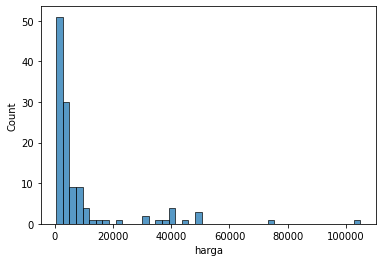

In [218]:
sns.histplot(data=a, x='harga')

In [219]:
# kita pisahkan terlebih dahulu outliernya agar mendapat visual yang lebih jelas
index = (a.harga  - a.harga.mean()) <= (2*a.harga.std())
no_outlier_jakarta = a[index]

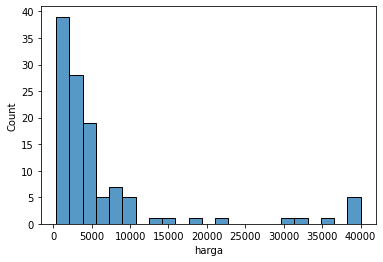

In [220]:
sns.histplot(data=no_outlier_jakarta, x='harga')

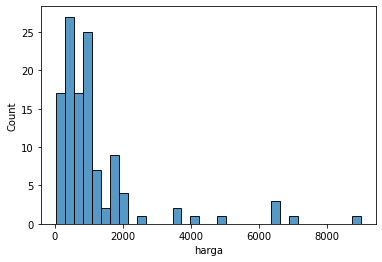

In [221]:
sns.histplot(data=b, x='harga')

In [222]:
# kita pisahkan terlebih dahulu outliernya agar mendapat visual yang lebih jelas
index = (b.harga  - b.harga.mean()) <= (2*b.harga.std())
no_outlier_depok = b[index]

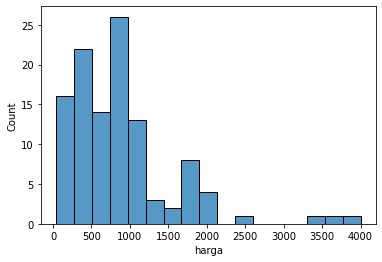

In [223]:
sns.histplot(data=no_outlier_depok, x='harga')

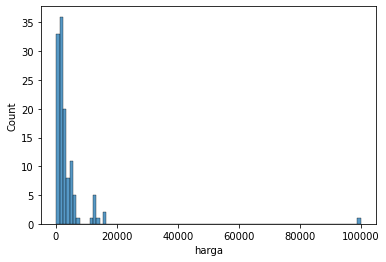

In [224]:
sns.histplot(data=c, x='harga')

In [225]:
# kita pisahkan terlebih dahulu outliernya agar mendapat visual yang lebih jelas
index = (c.harga  - c.harga.mean()) <= (2*c.harga.std())
no_outlier_tangerang = c[index]

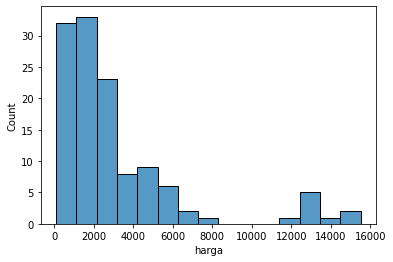

In [226]:
sns.histplot(data=no_outlier_tangerang, x='harga')

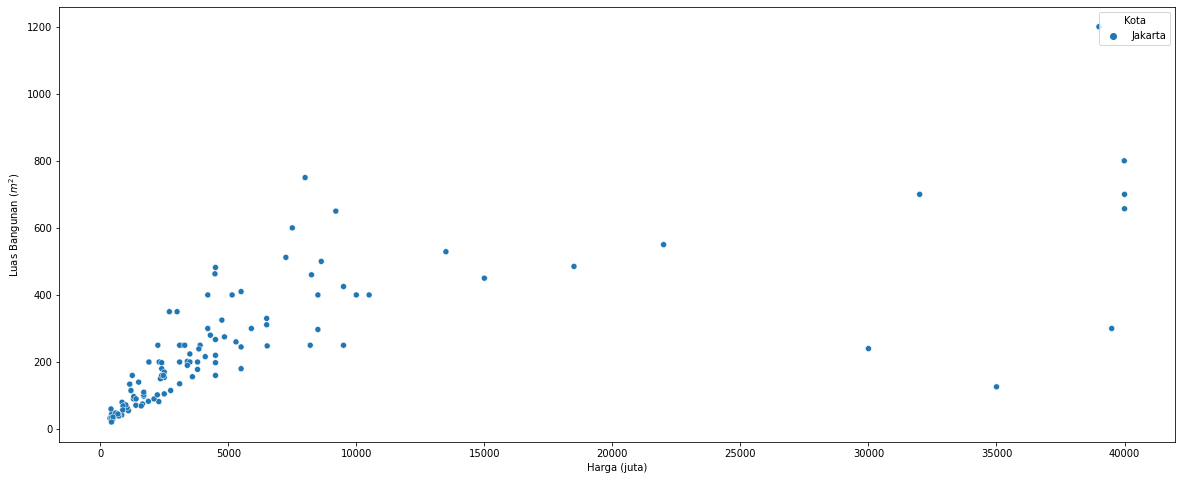

In [227]:
plt.figure(figsize = (20, 8))
plt.xlabel('Harga (juta)')
plt.ylabel('Luas Bangunan ($m^2$)')
p = sns.scatterplot(x="harga", y="LB", hue='Kota', data=no_outlier_jakarta)

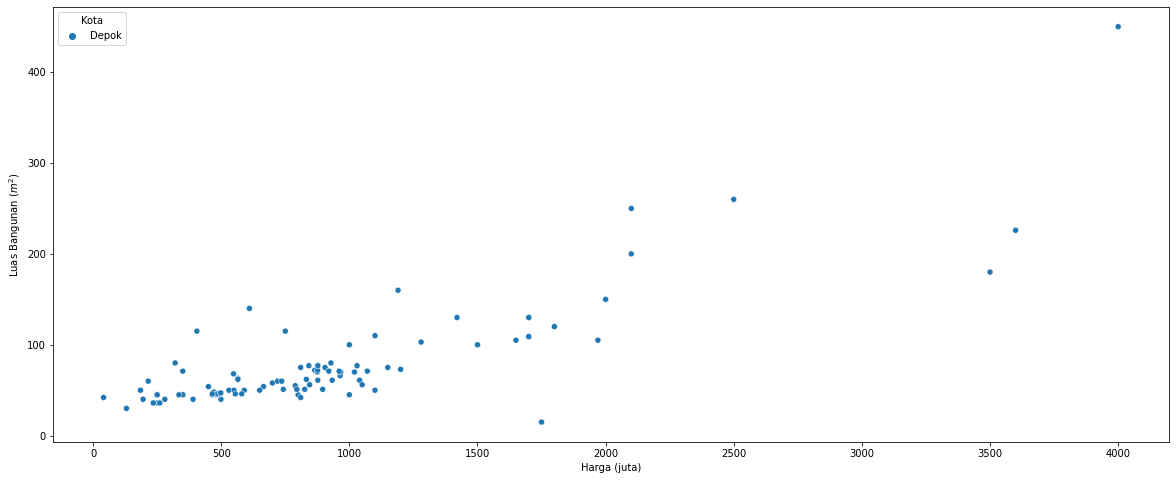

In [228]:
plt.figure(figsize = (20, 8))
plt.xlabel('Harga (juta)')
plt.ylabel('Luas Bangunan ($m^2$)')
p = sns.scatterplot(x="harga", y="LB", hue='Kota', data=no_outlier_depok)

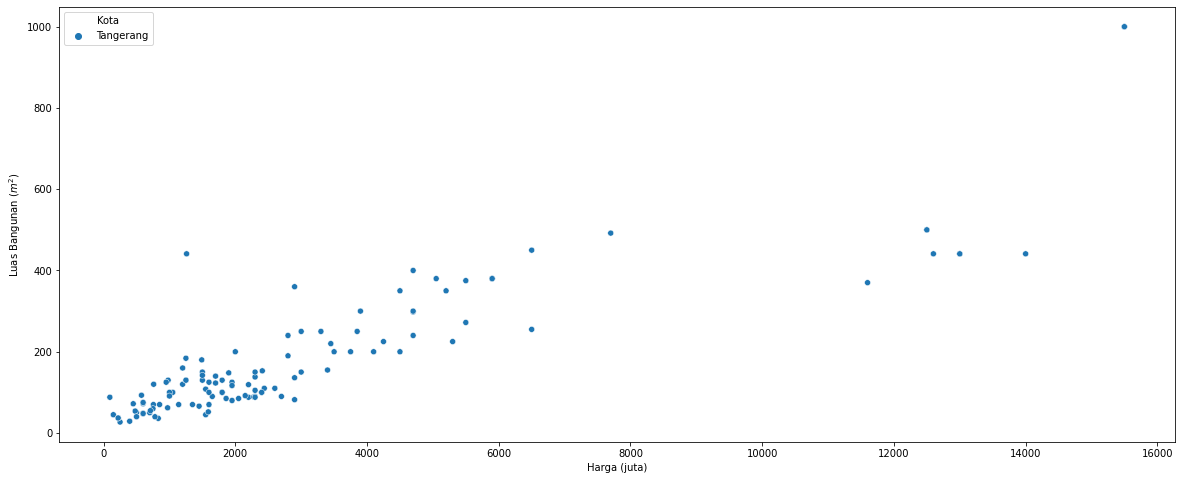

In [229]:
plt.figure(figsize = (20, 8))
plt.xlabel('Harga (juta)')
plt.ylabel('Luas Bangunan ($m^2$)')
p = sns.scatterplot(x="harga", y="LB", hue='Kota', data=no_outlier_tangerang)

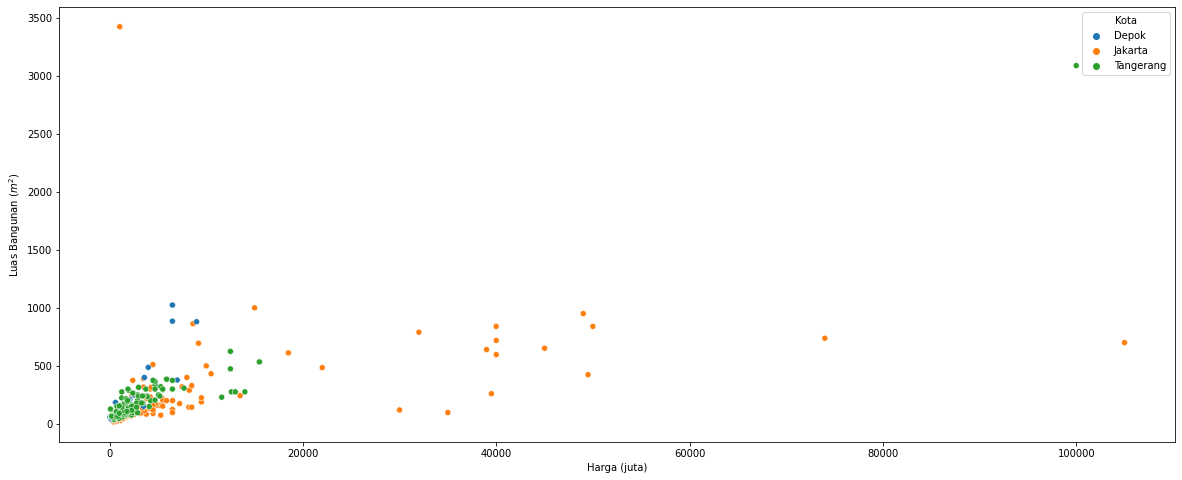

In [230]:
plt.figure(figsize = (20, 8))
plt.xlabel('Harga (juta)')
plt.ylabel('Luas Bangunan ($m^2$)')
p = sns.scatterplot(x="harga", y="LB", hue='Kota', data=df)

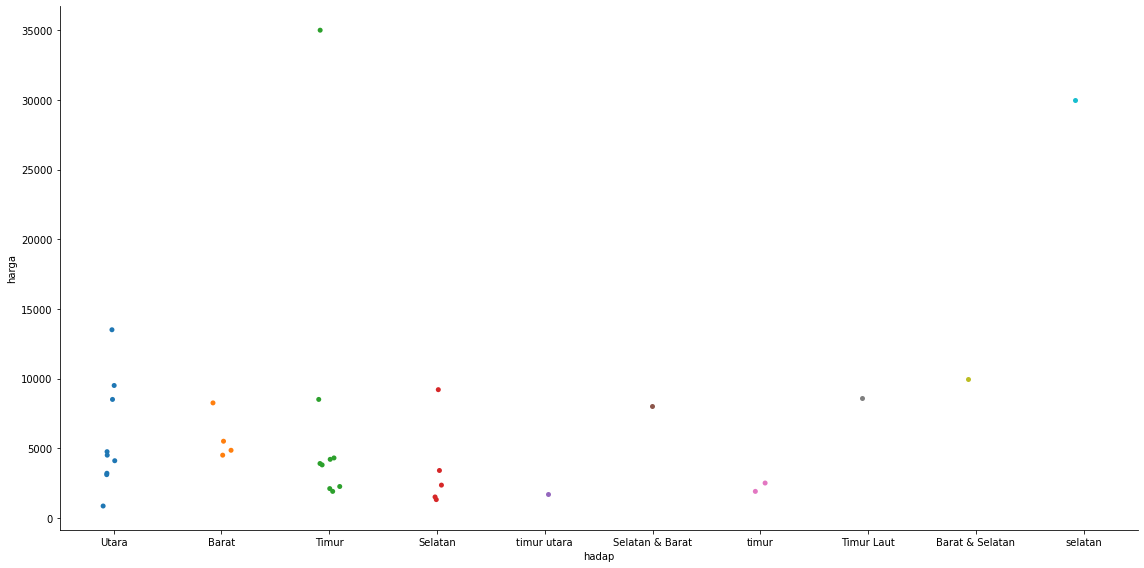

In [231]:
sns.catplot(data=no_outlier_jakarta, x='hadap', y='harga',height=8, aspect=2)

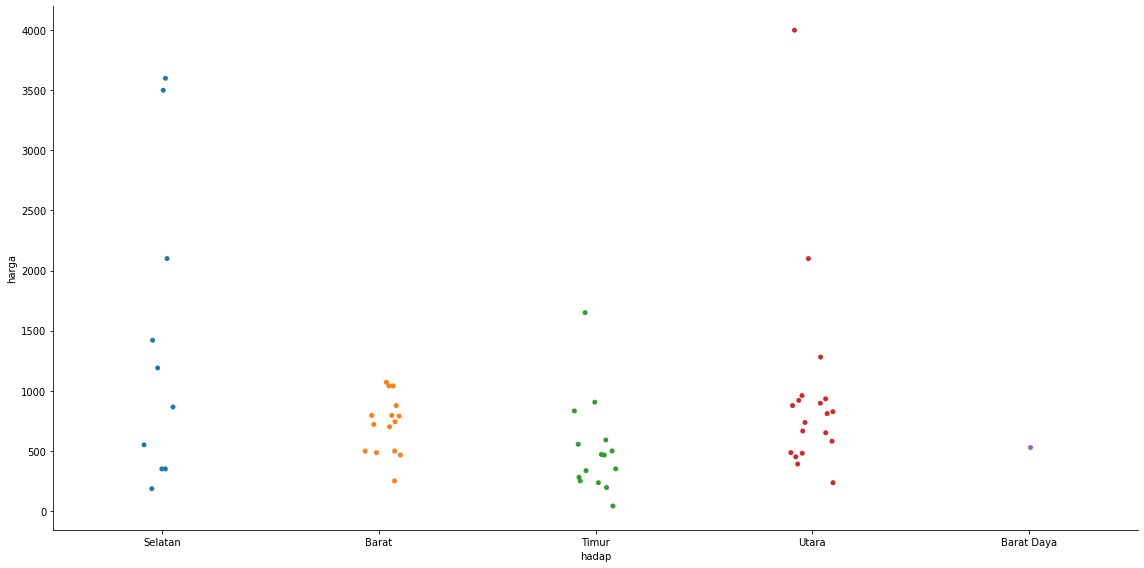

In [232]:
sns.catplot(data=no_outlier_depok, x='hadap', y='harga', height=8, aspect=2)

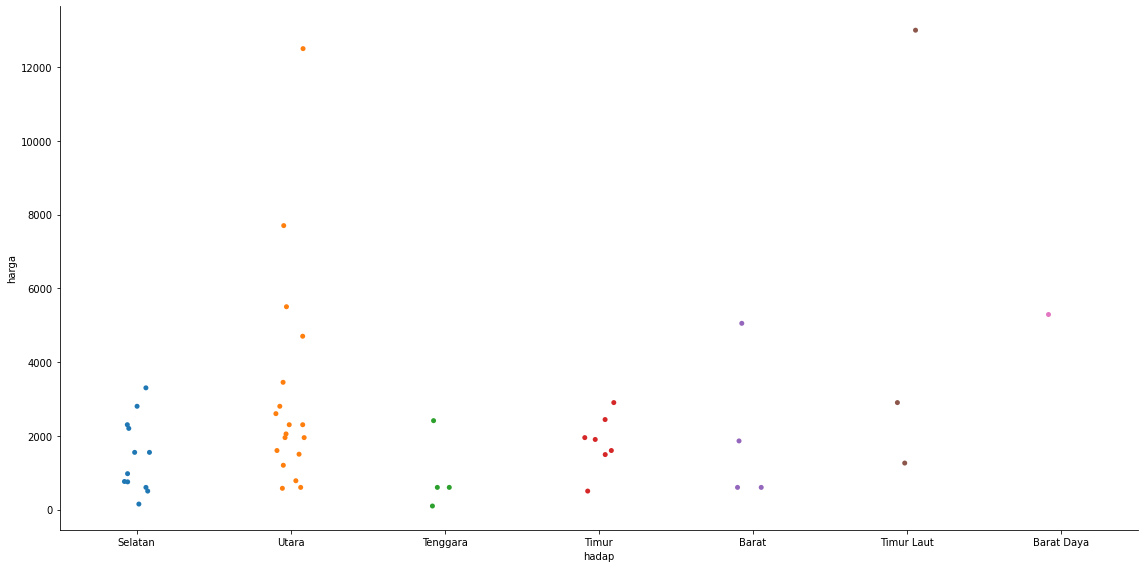

In [233]:
sns.catplot(data=no_outlier_tangerang, x='hadap', y='harga', height=8, aspect=2)

In [234]:
df['sertifikat'].value_counts()

SHM                                304
lainnya(PPJB, GIRIK, ADAT, dll)     16
SHM + IMB                           12
HGB                                 11
SHGB                                 8
PPJB                                 7
Lainnya                              2
AJB                                  1
SHM + Hak Pakai                      1
SHM + IMB + PBB                      1
Name: sertifikat, dtype: int64

In [235]:
# kita grouping berdasar hadap utara di daerah kota tangerang untuk melihat adakah rekomendasi yang bisa diambil
grouped_hadap_kota = c.groupby('hadap')
hadap_utara_tangerang = grouped_hadap_kota.get_group('Utara')
hadap_utara_tangerang

,created_at,Kota,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
9,12-06-2021,Tangerang,160.0,160.0,3.0,2.0,NaN,NaN,"CIKUPA CITRA JAYA, TANGERANG",SHM,3500.0,Utara,1200.0,https://www.rumah123.com/properti/tangerang/ho...,"Memiliki fasilitas AC, Masjid, Taman, Keamanan..."
15,12-06-2021,Tangerang,90.0,72.0,2.0,1.0,NaN,1.0,"GRAHA RAYA, TANGERANG",SHM,2200.0,Utara,600.0,https://www.rumah123.com/properti/tangerang/ho...,"Perumahan Griya/Bintaro/Bsd, dekat tol Bintaro..."
17,12-06-2021,Tangerang,144.0,117.0,3.0,3.0,NaN,1.0,"BANJAR WIJAYA, TANGERANG",SHM,2200.0,Utara,1950.0,https://www.rumah123.com/properti/tangerang/ho...,Lokasi rumah berada di boulevard perum banjar ...
30,12-06-2021,Tangerang,84.0,85.0,3.0,2.0,NaN,1.0,"BSD EMINENT, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",NaN,Utara,2050.0,https://www.rumah123.com/properti/tangerang/ho...,"PPJB siap AJB, luas tanah 84m², luas bangunan ..."
38,12-06-2021,Tangerang,295.0,272.0,4.0,3.0,NaN,2.0,"BSD DELATINOS, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200.0,Utara,5500.0,https://www.rumah123.com/properti/tangerang/ho...,Rumah bagus terletak di BSD City dengan lingku...
44,12-06-2021,Tangerang,105.0,105.0,2.0,2.0,NaN,1.0,"BSD THE GREEN, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",NaN,Utara,2300.0,https://www.rumah123.com/properti/tangerang/ho...,"DIJUAL Rumah 2 Lantai Bangunan Standart, Posis..."
52,12-06-2021,Tangerang,96.0,110.0,3.0,3.0,NaN,2.0,"BSD CITY, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",4400.0,Utara,2600.0,https://www.rumah123.com/properti/tangerang/ho...,"Dijual cepat Rumah baru di bsd city, LT: 96(8×..."
54,12-06-2021,Tangerang,474.0,500.0,6.0,5.0,4.0,2.0,"BSD DE PARK, TANGERANG",SHM,23000.0,Utara,12500.0,https://www.rumah123.com/properti/tangerang/ho...,"LT 474, LB +/- 500 (full renovated), KT 6+2, K..."
57,12-06-2021,Tangerang,180.0,220.0,3.0,3.0,NaN,1.0,"BSD, TANGERANG",SHM,3300.0,Utara,3450.0,https://www.rumah123.com/properti/tangerang/ho...,Rumah Cantik Siap Huni Di BSD Tangerang Selata...
65,12-06-2021,Tangerang,77.0,70.0,3.0,2.0,NaN,1.0,"BSD GREEN WICH, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",NaN,Utara,1600.0,https://www.rumah123.com/properti/tangerang/ho...,"Rumah nyaman di Cluster Hyland Greenwich BSD, ..."


In [236]:
index = (hadap_utara_tangerang.harga - hadap_utara_tangerang.harga.mean()) <= (2*hadap_utara_tangerang.harga.std())
kota_no_outlier_tangerang = hadap_utara_tangerang[index]

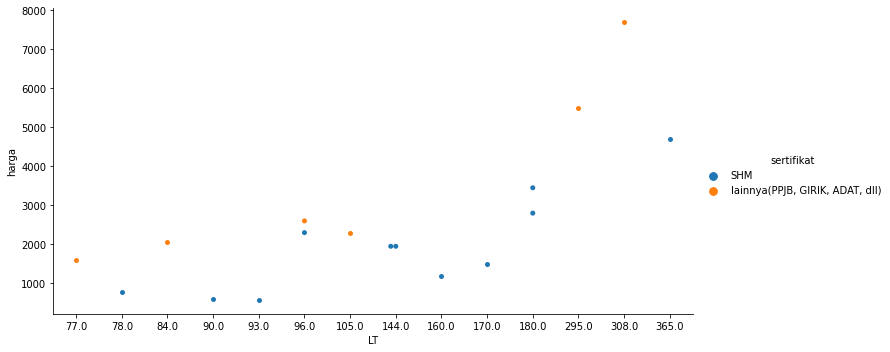

In [237]:
sns.catplot(data=kota_no_outlier_tangerang, x='LT', y='harga', hue='sertifikat', kind='swarm', height=5, aspect=2)

In [238]:
hadap_utara_tangerang[hadap_utara_tangerang['LT'] == 160]

,created_at,Kota,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
9,12-06-2021,Tangerang,160.0,160.0,3.0,2.0,NaN,NaN,"CIKUPA CITRA JAYA, TANGERANG",SHM,3500.0,Utara,1200.0,https://www.rumah123.com/properti/tangerang/ho...,"Memiliki fasilitas AC, Masjid, Taman, Keamanan..."


In [239]:
hadap_utara_tangerang[hadap_utara_tangerang['LT'] == 170]

,created_at,Kota,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
75,12-06-2021,Tangerang,170.0,150.0,4.0,2.0,NaN,1.0,"PINANG, TANGERANG",SHM,2200.0,Utara,1500.0,https://www.rumah123.com/properti/tangerang/ho...,Lokasi strategis 1 km dari tol kunciran


In [240]:
no_outlier_jakarta[no_outlier_jakarta['LT'] == 3422]

,created_at,Kota,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
14,05-12-2021,Jakarta,3422.0,64.0,1.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1050.0,https://www.rumah.com/listing-properti/dijual-...,Vlaster cempaka merupakan suatu kompleks perum...


##1. Kualitas data yang dimiliki perusahaan masih sangat kurang karena masih terdapat banyak missing value dan skala dalam penulisan harga masih berbeda.
##2. Perbaiki kualitas data yang diambil
##3. Dari data yang ada teerdapat kecenderungan harga di suatu kota. Rumah di Jakarta memiliki harga jual yang lebih mahal dibandingkan dengan Depok dan Tangerang. Depok merupakan daerah dengan harga jual rumah yang cenderung lebih murah.
##4. Dari data yang ada, kami menyarankan untuk RPPI membuka cabang kantor baru di kota Tangerang, karena cenderung memiliki harga yang murah dan luas bangunan yang besar, sehingga berkemungkinan lebih banyak pembelinya.
##5. Rumah dengan karakteristik seperti apa yang paling banyak dijual? Rumah yang menghadap ke Utara dan bersertifikat SHM
##6. Rumah yang kami rekomendasi untuk investasi RPPI
####- Rumah di Jakarta Pusat, dengan luas tanah 3422 $m^2$, harga 1.05 Milyar Rupiah. Meskipun rumah ini memiliki luas bangunan yang kecil, 64 $m^2$, tetapi rumah ini sangat menarik karena memiliki luas tanah yang sangat luas. Rumah ini juga telah memiliki sertifikat SHM. Lebih lanjut, rumah dapat dilihat melalui URL :https://www.rumah.com/listing-properti/dijual-cempaka-putih-oleh-hardi-prastian-19352202
####- Rumah di Tangerang seharga 1.2 milyar rupiah, dengan lokasi di Cikupa Citra Jaya memiliki luas tanah 160 $m^2$ dan luas bangunan 160 $m^2$, dengan 3 kamar tidur dan 2 kamar mandi, bersertifikat SHM. Lebih lanjut, rumah dapat dilihat melalui URL: https://www.rumah123.com/properti/tangerang/hos9292171/
####- Rumah di Tangerang seharga 1.5 milyar rupiah, dengan lokasi di Pinang memiliki luas tanah 170 $m^2$ dan luas bangunan 150 $m^2$, dengan 4 kamar tidur, 2 kamar mandi, dan 1 carport, bersertifikat SHM. Lebih lanjut, rumah dapat dilihat melalui URL: https://www.rumah123.com/properti/tangerang/hos9290814/
##7. Di Kota Jakarta terdapat rumah dengan luas 3422 $m^2$ dengan harga miring, padahal ini berada di Jakarta Pusat yang merupakan pusat dari Ibukota negara.